In [1]:
# install libraries

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
pd.set_option("display.max_columns", 101)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Column | Description
:---|:---
`surface_area` | The total area in square kilometers
`agricultural_land` | The agricultural land of the total area in square kilometers 
`forest_area` | The forest area in the total area in square kilometers
`armed_forces_total` | The count of armed forces paid by this geographical area
`urban_pop_major_cities` | The percent of the total population dwelling in major cities
`urban_pop_minor_cities` | The percent of the total population dwelling in minor cities
`national_income` | National Income as an ordinal categorical variable
`inflation_annual` | Yearly Inflation Rate
`inflation_monthly` | Average Monthly Inflation Rate = annual inflation/12
`inflation_weekly` | Average Weekly Inflation Rate = annual inflation/52
`mobile_subscriptions` | Describes the number of mobile subscriptions per person 
`internet_users` | The average number of people using the internet in a range of 100 or 1000 people
`secure_internet_servers_total` | The actual number of secure internet servers in the area
`improved_sanitation` | The known access of the population to improved sanitation facilities
`women_parliament_seats_rate ` | Describes the percent range of parliament seats occupied by women
`life_expectancy` | Years of life an average person is expected to live in this area (target variable).

## Data Wrangling & Visualization (подготовка данных и визуализация)

In [3]:
# Dataset is already loaded below (загрузка данных из csv-файла)

df = pd.read_csv("train.csv",index_col=0)

In [4]:
# Explore the first five rows (представьте 5 первых строк)

df.head(5)

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


In [5]:
# Find number of rows and columns (определите кол-во строк и столбцов в таблице)

df.shape

(362, 16)

In [6]:
# Explore column types (исследуйте типы колонок)

df.dtypes

surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                   object
inflation_annual                 float64
inflation_monthly                float64
inflation_weekly                 float64
mobile_subscriptions              object
internet_users                    object
secure_internet_servers_total    float64
improved_sanitation               object
women_parliament_seats_rate       object
life_expectancy                  float64
dtype: object

In [7]:
# Description (описание таблицы)

df.describe()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total,life_expectancy
count,3.620000e+02,3.580000e+02,3.570000e+02,3.180000e+02,360.000000,360.000000,146.000000,156.000000,20.000000,3.520000e+02,362.000000
mean,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,1.681539,0.475969,0.396478,2.949654e+08,71.059691
std,1.234491e+07,4.964143e+08,3.796623e+08,2.994686e+06,20.512885,21.206494,0.980308,0.153430,0.203583,7.234006e+08,8.332818
min,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,-2.372263,0.250543,0.209993,4.002500e+04,48.850634
25%,2.783000e+04,1.054198e+06,4.951445e+05,1.218000e+04,10.624625,11.013743,1.202953,0.347799,0.232118,3.468446e+06,65.469854
50%,2.037745e+05,5.360256e+06,3.928535e+06,5.352500e+04,24.459439,26.735127,1.762683,0.459790,0.297938,2.671228e+07,73.238024
75%,1.081610e+06,4.221935e+07,2.241297e+07,2.598000e+05,38.587177,43.499418,2.485675,0.577340,0.537541,2.173937e+08,77.125610
max,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,2.997694,0.810152,0.781527,8.207343e+09,83.480488


Discriptive statistic indicates that in general "surface_area" values (total area of lands) are smaller than "argicultural_land" and "forst_area" values (argicultural and forest portions of the total area). It seems there is data entry problem. Following analysese are preformed to address this issue.

Описательная статистика показывает, что в целом значения "surface_area" (общая площадь земель) меньше значений "argicultural_land" и "forst_area" (аргикультурные и лесные участки общей площади). Похоже, есть проблема с вводом данных (единица измерения). Для решения этой проблемы проводятся следующие анализы.
Можно определить по последнему показателю таблицы с описанием данных, по строке  Max. Видно, что степень surface_area меньше, чем степени agricultural_land и forest_area.

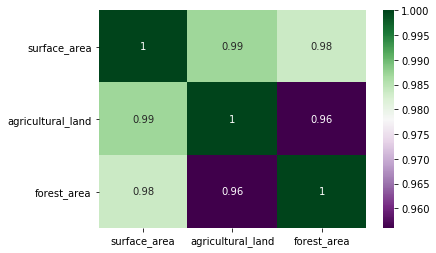

In [8]:
# Check if these three variables are highly correlated (multicollinearity problem)

# Проверить, есть ли корреляция между тремя переменными (проблема мультиколлинеарности)

sns.heatmap(df[['surface_area', 'agricultural_land','forest_area']].corr(),
            cmap='PRGn',annot=True)

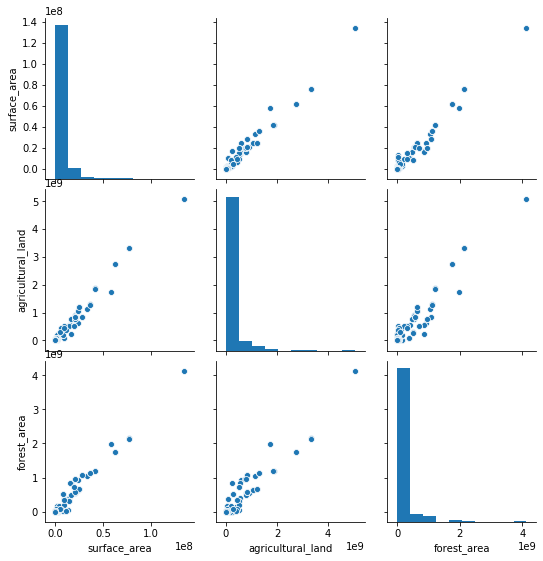

In [9]:
# Plot pairwise relationship and distribution of these three variables (correlation matrix)

# Построить парные взамосвязи между переменными

sns.pairplot(df[['surface_area', 'agricultural_land','forest_area']])

***We can see strong linear relationship among 'surface_area', 'agricultural_land', and 'forest_area'.*** It is not good for future analysis and prediction, because multicollinearity problem can deacrease perfomance of model.
To fix that problem following steps are taken:
1) Multiply 'surface_area' by 100 (to fix data entry/unit issue).
2) Create two new features (colums) namely 'agricultural_portion' and 'forest_portion' by dividing 'agricultural_land' and 'forest_area' by 'surface_area' respectively.
3) Remove 'agricultural_land' and 'forest_area' colums from dataset.

***Можно заметить сильную взаимосвязь между тремя признаками, что не очень хорошо для дальнейшего анализа, поскольку проблема мультиколлинеарности снижает качество моделирования.*** Чтобы исправить эту проблемы были предприняты следующие шаги: 1) Умножить 'surface_area' на 100 (чтобы привести к единой единице измерения). 2) Создать два новых столбца для доли 'agricultural_portion'  и 'forest_portion' в общем числе 'surface_area'. 3) Удалить 'agricultural_land' и 'forest_area'.

In [10]:
# make a copy of the orginal dataframe
df1 = df.copy()

# Step 1: Multiply 'surface_area' by 100
df1['surface_area'] = df1['surface_area'] * 100

# Step 2: Creates new variables 
df1['agricultural_portion'] = df1['agricultural_land'] / df1['surface_area'] 
df1['forest_portion'] = df1['forest_area'] / df1['surface_area']

# Step 3: Remove 'agricultural_land' and 'forest_area' colums from dataset
df1.drop(['agricultural_land', 'forest_area'], axis=1, inplace=True)

# Show the first 2 row of df1
df1.head(2)

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion
0,12054000.0,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195,0.218420,0.449464
1,75261000.0,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2623624.0,low access,[0%-25%),59.237366,0.319294,0.658715


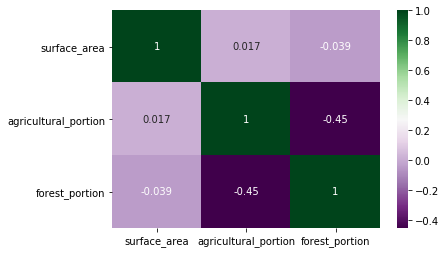

In [11]:
# Check correlations among 'surface_area', 'agriculture_portion' & 'forest_portion' for multicollinearity
# Проверим наличие взаимосвязей после изменений
sns.heatmap(df1[['surface_area', 'agricultural_portion','forest_portion']].corr(),
            cmap='PRGn',annot=True)

Видим, что изменения исправили ситуацию и коэффициент корреляции между переменными действительно не показывает сильную зависимость.

In [12]:
df1.head(2)

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion
0,12054000.0,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195,0.218420,0.449464
1,75261000.0,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2623624.0,low access,[0%-25%),59.237366,0.319294,0.658715


**The variable description indicates 'inflation_annual', 'inflation_monthly', and 'inflarion_weekly' are linearly dependent.**  <br> Therefore, we will keep only 'inflation_annual' column and replace NaN values using information from the other two features (if possible).

***Переменные с данными по инфляции линейно связаны, поскольку отражают динамику одного и того же показателя.*** <br>Мы можем оставить только одну переменную 'inflation_annual', а два других признака использовать для заполнения пустых значений.

In [13]:
# Check missing values

# Проверяем кол-во пустых значений

df1.isnull().sum()

surface_area                       0
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
agricultural_portion               4
forest_portion                     5
dtype: int64

In [14]:
# To find for how many instances all the three values are missing

# Чтобы определить сколько значений пустых для всех трех признаков одновременно

len(df1[(df1['inflation_annual'].isnull()) &\
        (df1['inflation_monthly'].isnull()) &\
        (df1['inflation_weekly'].isnull())])

40

In [15]:
# Replace missing values in column 'inflation_annual' with information from
# columns 'inflation_monthly' & 'inflation_weekly'

# Заменить пропущенные значения в столбце с использованием значений двух других столбцов

for i in df1.index:
    if np.isnan(df1.loc[i, 'inflation_annual']):
        if np.isnan(df1.loc[i, 'inflation_monthly']):
            df1.loc[i, 'inflation_annual'] = 52 * df1.loc[i, 'inflation_weekly']
        else:
            df1.loc[i, 'inflation_annual'] = 12 * df1.loc[i, 'inflation_monthly']


In [16]:
df1.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,
            ...
            450, 451, 452, 454, 456, 457, 458, 459, 460, 461],
           dtype='int64', length=362)

In [17]:
# Remove columns 'inflation_monthly' & 'inflation_weekly'

# Удалить столбцы 'inflation_monthly' & 'inflation_weekly'

df1.drop(['inflation_monthly', 'inflation_weekly'], axis=1, inplace=True)

In [18]:
df1.isnull().sum()

surface_area                      0
armed_forces_total               44
urban_pop_major_cities            2
urban_pop_minor_cities            2
national_income                   0
inflation_annual                 40
mobile_subscriptions              0
internet_users                    0
secure_internet_servers_total    10
improved_sanitation               0
women_parliament_seats_rate       0
life_expectancy                   0
agricultural_portion              4
forest_portion                    5
dtype: int64

In [19]:
# Convert categorical and ordinal fearures into numeric features

# Decide which categorical variables you want to use in model

for col_name in df1.columns:
    if df1[col_name].dtypes == 'object':
        unique_cat = len(df1[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'national_income' has 7 unique categories
Feature 'mobile_subscriptions' has 5 unique categories
Feature 'internet_users' has 198 unique categories
Feature 'improved_sanitation' has 6 unique categories
Feature 'women_parliament_seats_rate' has 4 unique categories


There are too many categories in 'internet_users'. It's more simillar to a numeric feature! Let's check...

In [20]:
# Explore values in 'internet_users' column

df1['internet_users']

0        0 per 1000 people
1      154 per 1000 people
2        90 per 100 people
3        76 per 100 people
4      350 per 1000 people
              ...         
457      90 per 100 people
458      84 per 100 people
459      58 per 100 people
460      44 per 100 people
461      45 per 100 people
Name: internet_users, Length: 362, dtype: object

In [21]:
(df1['internet_users']=='unknown').sum()

6

In [22]:
(df1['internet_users'].isnull()).sum()

0

In [23]:
# lst = []
# for i in df1['internet_users'].index:
#     try:
#         k = int(df1['internet_users'][i].split()[0])/int(df1['internet_users'][i].split()[2])
#     except ValueError:
#         k = 0
#     lst.append(k)
# df1['percent_internet_users'] = pd.DataFrame(lst)

In [24]:
# Convert 'internet_users' column to associated percentages

variable_split = df1['internet_users'].str.split()
df1['percent_internet_users'] = (pd.to_numeric(variable_split.str.get(0), errors='coerce') / 
                          pd.to_numeric(variable_split.str.get(2), errors='coerce'))

In [25]:
# Remove 'internet_users' column

df1.drop('internet_users', axis=1, inplace=True)

In [26]:
# Check the frequency of categories (labels) in each categorical variable

for name in df1.select_dtypes(include=['object']):
    print(name,':')
    print(df1[name].value_counts(),'\n')

national_income :
low            81
very low       77
medium low     76
unknown        48
high           37
medium high    31
very high      12
Name: national_income, dtype: int64 

mobile_subscriptions :
more than 1 per person    188
less than 1 per person    164
unknown                     7
more than 2 per person      2
more than 3 per person      1
Name: mobile_subscriptions, dtype: int64 

improved_sanitation :
very high access    155
low access           55
medium access        54
high access          47
very low access      33
no info              18
Name: improved_sanitation, dtype: int64 

women_parliament_seats_rate :
[0%-25%)     249
[25%-50%)     82
unknown       30
[50%-75%)      1
Name: women_parliament_seats_rate, dtype: int64 



In [27]:
# Assign "mobile_subscriptions" values to 1 if mobile subscriptions is
# less than 1 per person, otherwise 2:

df1['mobile_subscriptions'] = [1 if x == 'less than 1 per person' else 2 for x in df1['mobile_subscriptions']]

In [28]:
# Assign "women_parliament_seats_rate" to 1 if women _parliament seat _rate is
# [0%-25%), 2 if it is [25%-75%), or 3 if unknown:

df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('[0%-25%)', 1))
df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('[25%-50%)', 2))
df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('[50%-75%)', 2))
df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('unknown', 3))

In [29]:
# Assign numeric values to the levels of "national_income" (ordinal variable):

mapper_1 = {'very low': 1, 'medium low': 2, 'low': 3,
            'medium high': 4, 'high': 5, 'very high': 6,
            'unknown': 7}

df1['national_income'].replace(mapper_1, inplace=True)

In [30]:
# Assign numeric values to the levels of "improved_sanitation" (Ordinal Variable):

mapper_2 = {'very low access': 1, 'low access': 2, 'medium access': 3,
            'high access': 4, 'very high access': 5, 'no info': 6}

df1['improved_sanitation'].replace(mapper_2, inplace=True)

In [31]:
# make a copy of df1

df2 = df1.copy()

# How much of your data is missing?

df2.isnull().sum().sort_values(ascending=False)

armed_forces_total               44
inflation_annual                 40
secure_internet_servers_total    10
percent_internet_users            6
forest_portion                    5
agricultural_portion              4
urban_pop_minor_cities            2
urban_pop_major_cities            2
life_expectancy                   0
women_parliament_seats_rate       0
improved_sanitation               0
mobile_subscriptions              0
national_income                   0
surface_area                      0
dtype: int64

In [32]:
# Impute missing values using SimpleImputer in sklearn

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df2)
df2 = pd.DataFrame(data=imp.transform(df2) , columns=df2.columns)

In [33]:
df2.isnull().sum().sort_values(ascending=False)

percent_internet_users           0
forest_portion                   0
agricultural_portion             0
life_expectancy                  0
women_parliament_seats_rate      0
improved_sanitation              0
secure_internet_servers_total    0
mobile_subscriptions             0
inflation_annual                 0
national_income                  0
urban_pop_minor_cities           0
urban_pop_major_cities           0
armed_forces_total               0
surface_area                     0
dtype: int64

### Visualization, Modeling, Machine Learning

Can you construct a reliable model that predicts the life expectancy of an area (country, region, group of countries) using socioeconomic variables and identify how different features influence their decision? Please explain your findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.

- Build an optimized model that effectively solves the business problem.<br>
- The model would be evaluated on the basis of Mean Absolute Error.<br>
- Read the Test.csv file and prepare features for testing.<br>

In [34]:
def plot_histogram(x):
    plt.hist(x, color='gray', edgecolor='black', alpha=0.8)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

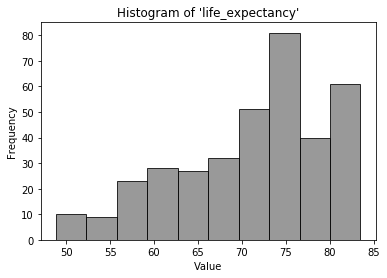

In [35]:
# Plot distribution of traget (outcome) variable in the training data

plot_histogram(df2['life_expectancy'])

In [36]:
len(list(df.columns))

16

In [38]:
# Loading Test data

test_data=pd.read_csv('test.csv',index_col=0)
test_data.head(2)

# Create a copy of test dataframe
tdf = test_data.copy()

# Step 1: Multiply 'surface_area' by 100
tdf['surface_area'] = tdf['surface_area'] * 100

# Step 2: Creates new variables 
tdf['agricultural_portion'] = tdf['agricultural_land'] / tdf['surface_area'] 
tdf['forest_portion'] = tdf['forest_area'] / tdf['surface_area']

# Step 3: Remove 'agricultural_land' and 'forest_area' colums from dataset
tdf.drop(['agricultural_land', 'forest_area'], axis=1, inplace=True)

# Step 4: Replace missing values in column 'inflation_annual' with information from
# columns 'inflation_monthly' & 'inflation_weekly'

for i in tdf.index:
    if np.isnan(tdf.loc[i, 'inflation_annual']):
        if np.isnan(tdf.loc[i, 'inflation_monthly']):
            tdf.loc[i, 'inflation_annual'] = 52 * tdf.loc[i, 'inflation_weekly']
        else:
            tdf.loc[i, 'inflation_annual'] = 12 * tdf.loc[i, 'inflation_monthly']

# Step5: Remove columns 'inflation_monthly' & 'inflation_weekly'
tdf.drop(['inflation_monthly', 'inflation_weekly'], axis=1, inplace=True)

# Step6: Convert 'internet_users' column to associated percentages
variable_split = tdf['internet_users'].str.split()
tdf['percent_internet_users'] = (pd.to_numeric(variable_split.str.get(0), errors='coerce') / 
                          pd.to_numeric(variable_split.str.get(2), errors='coerce'))

# Step 7: Remove 'internet_users' column
tdf.drop('internet_users', axis=1, inplace=True)

# Step 8: Assign "mobile_subscriptions" values to 1 if mobile subscriptions is
# less than 1 per person, otherwise 2:
tdf['mobile_subscriptions'] = [1 if x == 'less than 1 per person' else 2 for x in tdf['mobile_subscriptions']]

# Step 9: Assign "women_parliament_seats_rate" to 1 if women _parliament seat _rate is
# [0%-25%), 2 if it is [25%-75%), or 3 if unknown:

tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[0%-25%)', 1))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[25%-50%)', 2))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[50%-75%)', 2))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('unknown', 3))

# Step 10: Assign numeric values to the levels of "national_income" (ordinal variable):
mapper_1 = {'very low': 1, 'medium low': 2, 'low': 3,
            'medium high': 4, 'high': 5, 'very high': 6,
            'unknown': 7}
tdf['national_income'].replace(mapper_1, inplace=True)

# Step 11: Assign numeric values to the levels of "improved_sanitation" (Ordinal Variable):
mapper_2 = {'very low access': 1, 'low access': 2, 'medium access': 3,
            'high access': 4, 'very high access': 5, 'no info': 6}
tdf['improved_sanitation'].replace(mapper_2, inplace=True)

# Step12: SimpleImputer missing values using Imputer in sklearn.preprocessing
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(tdf)
tdf = pd.DataFrame(data=imp.transform(tdf) , columns=tdf.columns)

# Show the first 5 rows of tdf
tdf.head()

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,agricultural_portion,forest_portion,percent_internet_users
0,32246000.0,50800.0,0.846584,51.919416,3.0,2.569961,1.0,1849926.0,1.0,1.0,0.647799,0.327101,0.084
1,51312000.0,453550.0,42.139810,5.803190,3.0,2.184886,2.0,17983312.0,5.0,1.0,0.432774,0.319814,0.289
2,1858000.0,50800.0,1.699056,67.396944,7.0,3.009844,1.0,240458015.0,5.0,3.0,0.100766,0.458972,0.660
3,11249000.0,20000.0,48.602426,4.934574,3.0,5.161899,1.0,9427882.0,4.0,1.0,0.289123,0.431853,0.178
4,78356000.0,612800.0,43.734006,28.635994,2.0,7.493090,1.0,50379814.0,5.0,1.0,0.499240,0.149555,0.460


### Random Forest Regression

In [39]:
# Create outcome and input DataFrames

y = df2['life_expectancy']

X = df2.drop('life_expectancy', axis=1)

y.head(5)

0    69.494195
1    59.237366
2    81.300000
3    81.373197
4    73.193561
Name: life_expectancy, dtype: float64

In [40]:
# Create train and validation datasets to build the Random Forest (RF) regression
# model and find the best set of the model parameters 

X_train, X_validation, y_train, y_validation= train_test_split(X, y,
                                                 random_state = 0)

In [45]:
# Use 'Grid Search' to find the best set of RF regression parameters 
# using full dataset with criterion = 'mean absolute error' (mae) and 
# random_state = 33

n_estimators = [50, 100, 150, 200]
max_features = [4, 8, 13]
max_depth = [5, 6, 7]
min_split = [2, 3, 4] 
min_leaf = [1, 2, 3]
best_score = 100

for n in n_estimators:
    for f in max_features:
        for d in max_depth:
            for s in min_split:   
                for l in min_leaf:
                     rf = RandomForestRegressor(
                     n_estimators = n, 
                     criterion = 'mae', 
                     max_features= f,
                     random_state = 33, 
                     oob_score = False,
                     max_depth = d, min_samples_split = s, 
                     min_samples_leaf = l)
            rf.fit (X_train, y_train)    
#             y_model = rf.predict(X_validation)
            #score = mean_absolute_error(y, y_model)
            score = - np.mean(cross_val_score(rf, X_train, y_train, cv=4, scoring = 'neg_mean_absolute_error'))
            if score <= best_score:
                best_score = score
                max_n = n
                max_f = f
                max_d = d
                max_s = s
                max_l = l


print ("Number of Estimators:", max_n)               
print ("Max features:", max_f)
print ("Max Depth:", max_d)
print ("Min Split:", max_s)
print ("Min Leaf:", max_l)
print("Best Mean Absolute Error: {:.3f}".format(best_score))

Number of Estimators: 200
Max features: 8
Max Depth: 7
Min Split: 4
Min Leaf: 3
Best Mean Absolute Error: 2.651


In [46]:
# Fit a RF using best indentified parameters

rf = RandomForestRegressor(n_estimators=200, criterion = 'mae', max_features=8, random_state = 33,
                           max_depth=7, min_samples_split=4, min_samples_leaf=3)

rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=33, verbose=0, warm_start=False)

In [48]:
# Predict test instances using test dataframe (tdf)

y_predict_RF = rf.predict(X_validation)
y_predict_RF

array([76.66900612, 73.22093943, 75.03212154, 73.05430718, 61.18293793,
       73.53661498, 77.46693108, 80.55946154, 80.08711288, 78.64510389,
       75.80256246, 78.49408527, 80.49830732, 76.65904528, 66.617168  ,
       60.01222654, 75.73729697, 64.02529459, 75.17756568, 71.30152711,
       61.75651351, 57.32508376, 66.30748968, 74.32672543, 65.85878837,
       74.01906991, 60.65795942, 77.36309167, 72.44287265, 77.97266507,
       63.139498  , 71.71291965, 60.54591558, 74.37089729, 74.34344334,
       74.00858217, 58.04099112, 80.90235994, 74.11101367, 79.032921  ,
       62.34436193, 68.29825167, 79.71873992, 74.535426  , 80.18980968,
       59.72348313, 81.45931855, 70.80684825, 71.97262625, 80.89267779,
       77.46885188, 59.90407462, 72.01826614, 72.13935057, 64.21301908,
       76.85470199, 76.8973111 , 72.07743624, 74.51888528, 75.79973201,
       73.42243283, 78.62819561, 80.58273991, 74.13116473, 81.07692939,
       77.93045835, 57.46389171, 61.06715278, 61.24054294, 77.61

In [50]:
score_RF = mean_absolute_error(y_validation, y_predict_RF)
score_RF

2.4406442133456037

In [52]:
# Plot histograms to compare distribution of actual outcomes vs. prediction 
def plot_histogram_comp(x,y):
    plt.hist(x, alpha=0.5, edgecolor='black', label='Actual')
    plt.hist(y, alpha=0.5, edgecolor='black', label='Prediction')
    plt.title("Histogram of actual outcomes v.s predicted outcomes")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper left')
    plt.show()

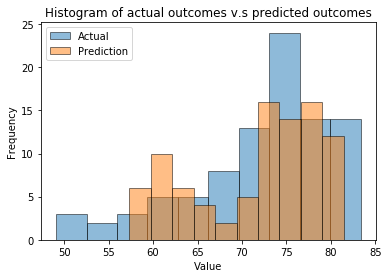

In [53]:
# Check to see if distribution of actual target values is close to the distribution
# of predicted target values

plot_histogram_comp(y_validation,y_predict_RF)

**The government wants to know what are the most important features for your model.  Can you tell them?**

> #### Task:
- **Visualize the top 13 features and their feature importance.**


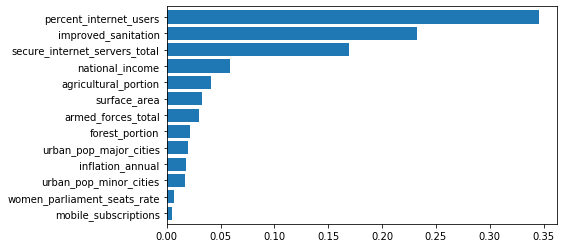

In [54]:
# Extract feature importance determined by RF model

feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_imp.sort_values(ascending=True, inplace=True)

# Creating a bar plot
feature_imp.plot(kind='barh', width=0.8, figsize=(7,4))

### Gradient boosting Regression

In [56]:
# Use 'Grid Search' to find the best set of GB regression parameters 
# using full dataset with criterion = 'mean absolute error' (mae) and 
# random_state = 33

n_estimators = [50, 100, 150, 200]
max_features = [4, 8, 13]
max_depth = [5, 6, 7]
min_split = [2, 3, 4] 
min_leaf = [1, 2, 3]
best_score = 100

for n in n_estimators:
    for f in max_features:
        for d in max_depth:
            for s in min_split:   
                for l in min_leaf:
                     gb = GradientBoostingRegressor(
                     n_estimators = n, 
                     criterion = 'mae', # mean absolute error
                     max_features= f,
                     random_state = 33,
                     max_depth = d, min_samples_split = s, 
                     min_samples_leaf = l)
            gb.fit (X_train, y_train)    
#             y_model = rf.predict(X_validation)
            #score = mean_absolute_error(y, y_model)
            score = - np.mean(cross_val_score(gb, X_train, y_train, cv=4, scoring = 'mean_squared_error'))
            if score <= best_score:
                best_score = score
                max_n = n
                max_f = f
                max_d = d
                max_s = s
                max_l = l


print ("Number of Estimators:", max_n)               
print ("Max features:", max_f)
print ("Max Depth:", max_d)
print ("Min Split:", max_s)
print ("Min Leaf:", max_l)
print("Best Mean Absolute Error: {:.3f}".format(best_score))

Number of Estimators: 200
Max features: 4
Max Depth: 7
Min Split: 4
Min Leaf: 3
Best Mean Absolute Error: 2.629


In [57]:
# Fit a RF using best indentified parameters

gb = GradientBoostingRegressor(n_estimators=200, criterion = 'mae', max_features=4, random_state = 33,
                           max_depth=7, min_samples_split=4, min_samples_leaf=3)

gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=4, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=33, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
# Predict test instances using test dataframe (tdf)

y_prediction_GB = gb.predict(X_validation)
y_prediction_GB

array([76.28113134, 72.42173803, 76.20186915, 75.22159287, 63.17184677,
       73.40716347, 77.03827807, 80.16237169, 79.85424575, 77.20731323,
       76.75690759, 79.24266154, 80.14539286, 77.86434382, 68.99859716,
       60.84700269, 75.87541332, 61.27629413, 75.79418075, 71.95127579,
       60.99213692, 57.12200651, 65.5825839 , 74.93086767, 67.21514028,
       74.11452108, 60.81977301, 78.82938651, 73.33575438, 78.62954871,
       66.7113169 , 71.1161632 , 60.4195253 , 73.94588626, 74.17815863,
       70.89638391, 58.01643704, 80.44463959, 72.67576324, 79.82927047,
       65.08233206, 69.24576507, 79.59499296, 75.83801645, 79.95199994,
       51.42667458, 81.41821912, 71.19134502, 72.75753454, 80.94814421,
       79.37584167, 59.77313709, 72.62979753, 74.27654954, 65.95186411,
       76.88000096, 76.92819746, 72.23093583, 75.73353853, 74.87651302,
       70.6696771 , 79.4486216 , 80.96500296, 74.30112168, 81.29340387,
       79.33189422, 53.35589774, 62.21487713, 62.70031131, 77.61

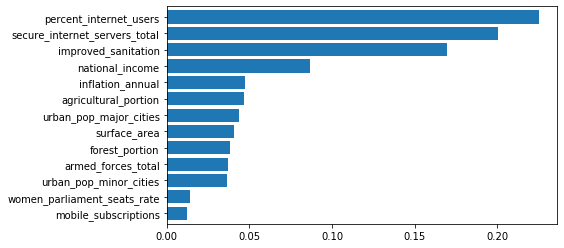

In [72]:
# Extract feature importance determined by RF model

feature_imp = pd.Series(gb.feature_importances_, index=X_train.columns)
feature_imp.sort_values(ascending=True, inplace=True)

# Creating a bar plot
feature_imp.plot(kind='barh', width=0.8, figsize=(7,4))

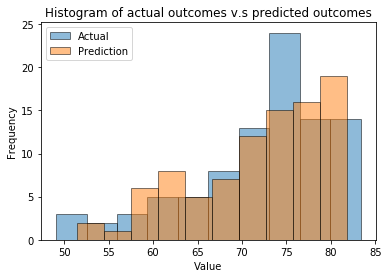

In [62]:
# Check to see if distribution of actual target values is close to the distribution
# of predicted target values

plot_histogram_comp(y_validation, y_prediction_GB)

In [64]:
score_RF = mean_absolute_error(y_validation, y_prediction_GB)
score_RF

2.157691415391827

**Видим, что градиентный бустинг показывает лучшее качество по средней абсолютной ошибке.**<br>
**Построим графики для визуального сравнения результатом двух алгоритмов.**

Text(0.5, 1.0, 'GradientBoostingRegressor')

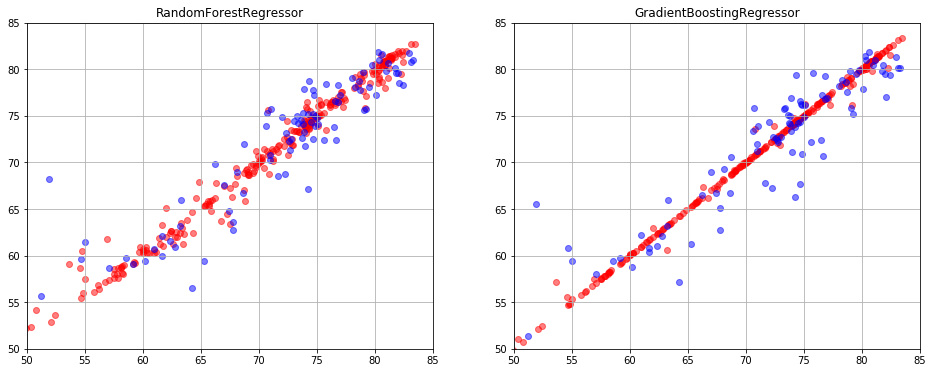

In [65]:
pylab.figure(figsize=(16, 6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.xlim(50,85)
pylab.ylim(50,85)
pylab.scatter(y_train, rf.predict(X_train) , alpha=0.5, color = 'red') # на обучении
pylab.scatter(y_validation, rf.predict(X_validation) , alpha=0.5, color = 'blue') # на тесте
pylab.title('RandomForestRegressor')

pylab.subplot(1,2,2)
pylab.grid(True)
pylab.xlim(50,85)
pylab.ylim(50,85)
pylab.scatter(y_train, gb.predict(X_train), alpha=0.5, color = 'red') # на обучении
pylab.scatter(y_validation, gb.predict(X_validation), alpha=0.5, color = 'blue') # на тесте
pylab.title('GradientBoostingRegressor')

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`Test.csv`), you must predict the value of the `life_expectancy` variable. You should submit a CSV file with a header row and one row per test entry. The file (submissions.csv) should have exactly 2 columns:

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **life_expectancy**

In [70]:
# Create a submission_df
y_predict = gb.predict(tdf)
d = {'id': test_data.index, 'life_expectancy': y_predict}
submission_df = pd.DataFrame(data=d)
submission_df

,id,life_expectancy
0,9,60.804544
1,16,73.732175
2,19,77.770190
3,23,70.414699
4,28,70.746146
...,...,...
95,433,56.034110
96,441,79.731037
97,443,70.826918
98,453,68.343669


In [71]:
# Submission

submission_df.to_csv('submissions.csv',index=False)